In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR9uxNh8fVxLZ4js0qa5l-BC1O5cxwlgaSycfOk4qRfyt7BizHwFgpgRCBF1QLki-4NIVJ4ljF15Rmh/pub?gid=1702990946&single=true&output=csv"
data = pd.read_csv(url)
data.head()

,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,...,Skill moves,Age,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Preferred foot,Nation,Position
0,Kylian Mbappé,91,97,90,80,92,36,78,97,97,...,5,25,NaN,NaN,NaN,NaN,NaN,Right,France,ST
1,Rodri,91,66,80,86,84,87,85,65,66,...,3,28,NaN,NaN,NaN,NaN,NaN,Right,Spain,CDM
2,Erling Haaland,91,88,92,70,81,45,88,80,94,...,3,24,NaN,NaN,NaN,NaN,NaN,Left,Norway,ST
3,Jude Bellingham,90,80,87,83,88,78,83,81,80,...,4,21,NaN,NaN,NaN,NaN,NaN,Right,England,CAM
4,Vini Jr.,90,95,84,81,91,29,69,95,95,...,5,24,NaN,NaN,NaN,NaN,NaN,Right,Brazil,LW


In [5]:
data.isna().sum() #Revisa los valores faltantes

,0
Name,0
OVR,0
PAC,0
SHO,0
PAS,0
DRI,0
DEF,0
PHY,0
Acceleration,0
Sprint Speed,0


In [6]:
gk_columns = ['GK Positioning', 'GK Diving', 'GK Kicking', 'GK Handling', 'GK Reflexes']
data[gk_columns] = data[gk_columns].fillna(0) ##Convierte los valores faltantes de las variables en cero

In [7]:
X = data.iloc[:, 1:-1].values ##Se extraen los datos
y = data.iloc[:,-1].values
y

array(['ST', 'CDM', 'ST', ..., 'CM', 'CM', 'LM'], dtype=object)

In [8]:
X

array([[91, 97, 90, ..., 0.0, 'Right', 'France'],
       [91, 66, 80, ..., 0.0, 'Right', 'Spain'],
       [91, 88, 92, ..., 0.0, 'Left', 'Norway'],
       ...,
       [53, 60, 58, ..., 0.0, 'Right', 'United States'],
       [53, 61, 52, ..., 0.0, 'Left', 'Switzerland'],
       [53, 60, 49, ..., 0.0, 'Left', 'Czech Republic']], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder #Convertir las variables en variable numérica
le = LabelEncoder()

X[:, -2] = le.fit_transform(X[:, -2]) #Codificar la columna de "prefered foot". (penúltima)

X[:, -1] = le.fit_transform(X[:, -1]) #Codificar la columna de "skill moves". (última)

print(X[:, -2:])  # Imprimir las últimas dos columnas para verificar la codificación

[[1 50]
 [1 128]
 [0 106]
 ...
 [1 146]
 [0 135]
 [0 37]]


In [10]:
df = pd.DataFrame(X) #Convertir el array en un dataframe
for col in df.columns: #Recorrer cada columna del dataframe
    df[col] = pd.to_numeric(df[col], errors='coerce') # Convertir a numérico, forzando errores a NaN

In [11]:
X = df.values
X

array([[ 91.,  97.,  90., ...,   0.,   1.,  50.],
       [ 91.,  66.,  80., ...,   0.,   1., 128.],
       [ 91.,  88.,  92., ...,   0.,   0., 106.],
       ...,
       [ 53.,  60.,  58., ...,   0.,   1., 146.],
       [ 53.,  61.,  52., ...,   0.,   0., 135.],
       [ 53.,  60.,  49., ...,   0.,   0.,  37.]])

In [12]:
from sklearn.impute import SimpleImputer  # Imputación de datos faltantes
imputer = SimpleImputer(missing_values=np.nan, strategy='median')  # Imputar los valores faltantes con la mediana
imputer.fit(X)  # Ajustar el imputador a los datos
X = imputer.transform(X)  # Imputar los valores faltantes en X
X

array([[ 91.,  97.,  90., ...,   0.,   1.,  50.],
       [ 91.,  66.,  80., ...,   0.,   1., 128.],
       [ 91.,  88.,  92., ...,   0.,   0., 106.],
       ...,
       [ 53.,  60.,  58., ...,   0.,   1., 146.],
       [ 53.,  61.,  52., ...,   0.,   0., 135.],
       [ 53.,  60.,  49., ...,   0.,   0.,  37.]])

In [13]:
X_ = X[:,:-1]  #Quitar la ultima columna
X_

array([[91., 97., 90., ...,  0.,  0.,  1.],
       [91., 66., 80., ...,  0.,  0.,  1.],
       [91., 88., 92., ...,  0.,  0.,  0.],
       ...,
       [53., 60., 58., ...,  0.,  0.,  1.],
       [53., 61., 52., ...,  0.,  0.,  0.],
       [53., 60., 49., ...,  0.,  0.,  0.]])

# KMEANS


In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)  # Número de clusters deseado
clusters = kmeans.fit_predict(X_)  # Asignar clusters a los datos

In [35]:
# Añadir los clusters al DataFrame original
data['Cluster'] = clusters

print(data[['Name', 'Nation', 'Cluster']].head())  # Muestra los primeros resultados


              Name   Nation  Cluster
0    Kylian Mbappé   France        0
1            Rodri    Spain        3
2   Erling Haaland   Norway        3
3  Jude Bellingham  England        3
4         Vini Jr.   Brazil        0


PCA


In [36]:
from sklearn.decomposition import PCA
# Crear un objeto PCA y ajustar los datos
pca = PCA(n_components=3)  # Queremos las tres primeras componentes principales
X_pca = pca.fit_transform(X_)

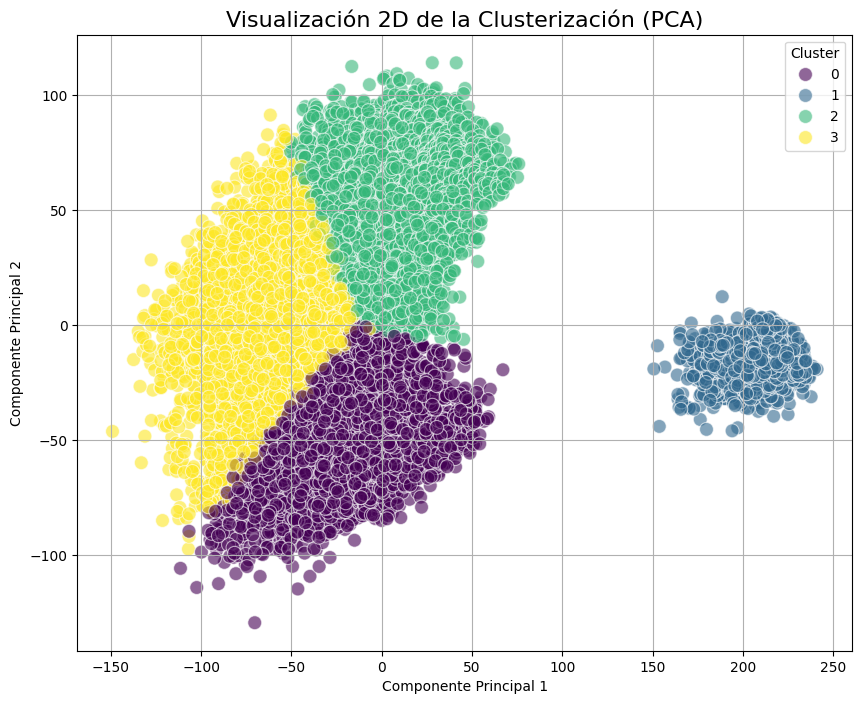

In [37]:
# Crear un gráfico de dispersión 2D usando las dos primeras componentes
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', alpha=0.6, s=100)
plt.title('Visualización 2D de la Clusterización (PCA)', fontsize=16)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


<ipython-input-38-4d3fa8becb9c>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', len(unique_clusters))  # Mapa de colores


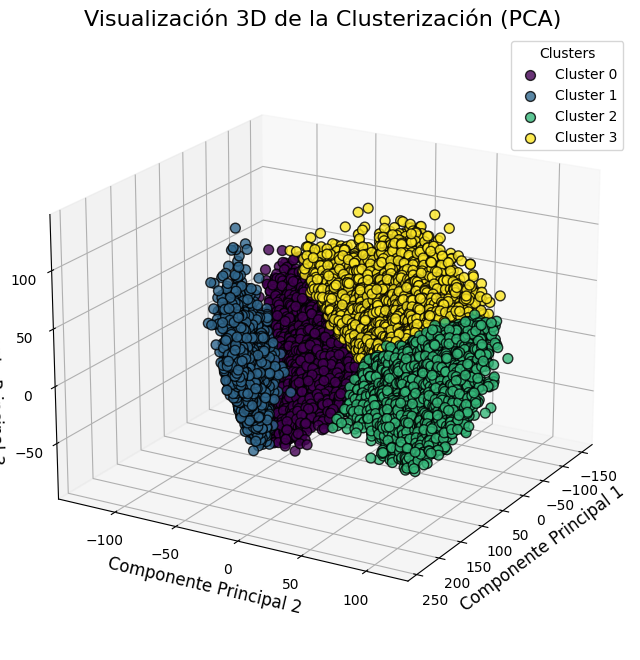

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Definir una paleta de colores para los clusters
unique_clusters = np.unique(clusters)  # Obtener los clusters únicos
colors = cm.get_cmap('viridis', len(unique_clusters))  # Mapa de colores

# Crear un gráfico de dispersión 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar cada cluster con un color sólido
for cluster in unique_clusters:
    ax.scatter(X_pca[clusters == cluster, 0],
               X_pca[clusters == cluster, 1],
               X_pca[clusters == cluster, 2],
               color=colors(cluster),
               label=f'Cluster {cluster}',
               s=50, alpha=0.8, edgecolor='k')

# Etiquetas y título
ax.set_title('Visualización 3D de la Clusterización (PCA)', fontsize=16)
ax.set_xlabel('Componente Principal 1', fontsize=12)
ax.set_ylabel('Componente Principal 2', fontsize=12)
ax.set_zlabel('Componente Principal 3', fontsize=12)

# Leyenda
ax.legend(title='Clusters', fontsize=10)

# Ajustar la vista
ax.view_init(elev=20, azim=30)  # Ajusta la elevación y la azimutal
plt.show()


# KMEANS ++

In [39]:
from sklearn.cluster import KMeans

kmeans_mas = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters_mas = kmeans_mas.fit_predict(X_)

In [40]:
def graficar_clusters_PCA2D(clusters, metodo, centroids):
    # Crear un gráfico de dispersión 2D usando las dos primeras componentes
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                    hue=clusters, palette='viridis',
                    alpha=0.6, s = 100)
    plt.scatter(centroids[:,0], centroids[:,1], c= 'black', s = 100, label = 'centroides')
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.grid(linestyle = "-", alpha = 0.5)
    plt.legend(title='Cluster')
    plt.show()

In [ ]:
centroides_kmeans_mas = kmeans_mas.cluster_centers_
centroides_kmeans_mas

array([[ 6.58039639e+01,  7.30671115e+01,  6.27686421e+01,
         5.75673077e+01,  6.65661303e+01,  3.32148744e+01,
         6.03475275e+01,  7.31840659e+01,  7.29531005e+01,
         6.43479199e+01,  6.40657378e+01,  6.51361852e+01,
         5.94497645e+01,  5.62496075e+01,  5.93618524e+01,
         5.92382261e+01,  5.41350078e+01,  4.98153454e+01,
         6.19599686e+01,  5.27468603e+01,  5.55781005e+01,
         6.64729199e+01,  7.11840659e+01,  6.95837912e+01,
         6.15011774e+01,  6.63779435e+01,  6.07388148e+01,
         2.95282575e+01,  5.47343014e+01,  3.09636970e+01,
         3.19097331e+01,  2.92580455e+01,  6.61291209e+01,
         6.34425039e+01,  6.21283359e+01,  5.04640895e+01,
         3.12715856e+00,  2.87519623e+00,  2.47327316e+01,
         1.58983937e-13,  9.32587341e-14,  6.15507645e-13,
         3.38395978e-13, -2.94875235e-13,  7.87284144e-01],
       [ 6.54262131e+01,  6.58829415e+01,  6.39144572e+01,
         6.30215108e+01,  6.67453727e+01,  3.58204102e+

In [ ]:
varianza = pca.explained_variance_ratio_
print(sum(varianza))

0.839709399866017


In [ ]:
centroides_kmeans_pca = pca.transform(centroides_kmeans)
centroides_kmeans_pca

array([[-18.92261285, -51.15290841, -19.91868549],
       [207.53624617, -14.95768587,  30.71744999],
       [  1.7006178 ,  51.9204732 , -17.30972911],
       [-57.46487019,   5.86526214,  22.12620196]])

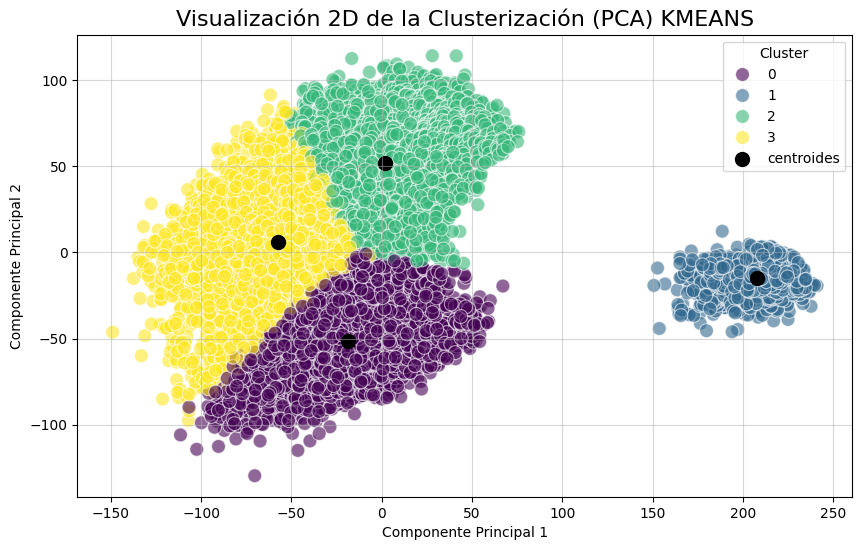

In [ ]:
kmeans_2D = graficar_clusters_PCA2D(clusters, 'KMEANS', centroides_kmeans_pca)
kmeans_2D

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import seaborn as sns

In [44]:
def graficar_clusters_PCA3D(clusters, metodo, centroids):
    # Crear un gráfico  3D
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                         c=clusters, cmap='viridis', s=100, alpha=0.6, edgecolor='white')
    ax.set_title(f'Visualización 3D de la Clusterización (PCA) {metodo}', fontsize=16)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    legend = ax.legend(*scatter.legend_elements(), title='Clusters')
    ax.add_artist(legend)
    plt.show()

# DISTANCIA EUCLEDIANA


In [28]:
import random

In [29]:
# Definimos la distancia Euclideana
def distancia_euclideana(x, c):
  return np.sqrt(np.sum((x - c) ** 2))

# Paso 1: Número de clusters
k = 4  # Por heurística de los datos y método del codo

# Paso 2: Elección de centroides
## Centroides
dimension = X_.shape[0]  # Número de jugadores (filas del DataFrame)
centroids = X_[random.sample(range(dimension), k)]
print(data.iloc[centroids[:,0],0])
print(data.iloc[centroids[:,1],0])
print(data.iloc[centroids[:,2],0])

### Almacenamiento de etiquetas
clusters_manuales = np.zeros(dimension)  ## vector nulo para almacenar etiquetas
### Almacenamiento de distancias
distancias = np.zeros((dimension, k))     ## Matriz nula para almacenar distancias

# Paso 3: Implementación del método y criterios de convergencia
tol = 1e-6
error = 100


70           Alexander Isak
72             Jules Koundé
61           Joshua Kimmich
73    Khvicha Kvaratskhelia
Name: Name, dtype: object
74         Vitinha
82     Cole Palmer
81        Palhinha
71    N'Golo Kanté
Name: Name, dtype: object
60         Bremer
65    David Alaba
60         Bremer
74        Vitinha
Name: Name, dtype: object


In [30]:

# Repetir hasta que los centroides dejen de moverse significativamente
while error > tol:
    # Asignación de puntos a los clusters más cercanos
    for i in range(dimension):  ## Iterar sobre las filas. La i representa jugador
        for j in range(k):      ## Iterar sobre las columnas. La j representa centroide
            distancias[i, j] = distancia_euclideana(X_[i], centroids[j])
        clusters_manuales[i] = np.argmin(distancias[i])

    # Almacenar los centroides previos antes de actualizarlos
    centroids_prev = np.copy(centroids) ## Creación variable auxiliar para comparar con los nuevos centroides

    # Actualizar centroides
    for l in range(k):  ### Iteramos sobre los clusters (k = 4)
        puntos_cluster = X_[clusters_manuales == l] ### Estamos tomando todos los puntos que tengan la etiqueta L

        # Si el cluster no está vacío, recalcula el centroide
        if len(puntos_cluster) > 0:
            centroids[l] = np.mean(puntos_cluster, axis=0)  ### Promedia los puntos que pertenecen al cluster, columna por columna
        else:
            print(f"Cluster {l} vacío, reasignando centroide aleatoriamente")
            centroids[l] = X_[np.random.choice(dimension)]

    # Calcular el error como el cambio promedio en los centroides. El while se detiene gracias a esta linea
    error = np.mean([distancia_euclideana(centroids[l], centroids_prev[l]) for l in range(k)])
    print(error)


41.873112065470046
7.237663343951588
6.159012340070477
5.008638437740101
3.5271522225602148
2.635310802082161
1.9383856855222041
1.374375760476875
0.9031497751658251
0.6625233061168021
0.5108187037021659
0.3774932755338501
0.22028725868111432
0.2094242317653905
0.11883234024349139
0.07961456223026016
0.04127042230590142
0.04904067750018821
0.05147752462929397
0.033143729701198436
0.020109398013983506
0.014388315301009024
0.0


In [41]:
centroids = np.array(centroids) ##45 dimensiones
centrooids = pca.transform(centroids) ##3 dimensiones

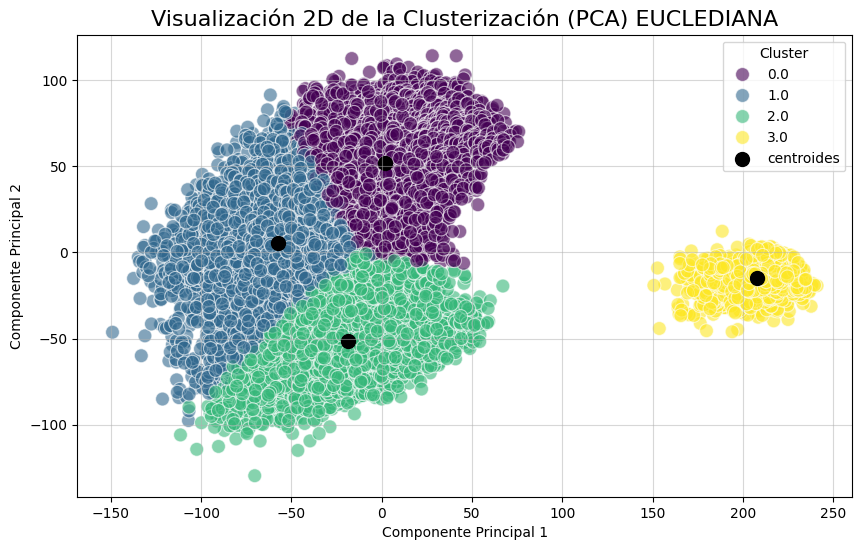

In [42]:
euclediana_2D = graficar_clusters_PCA2D(clusters_manuales, 'EUCLEDIANA', centrooids)
euclediana_2D

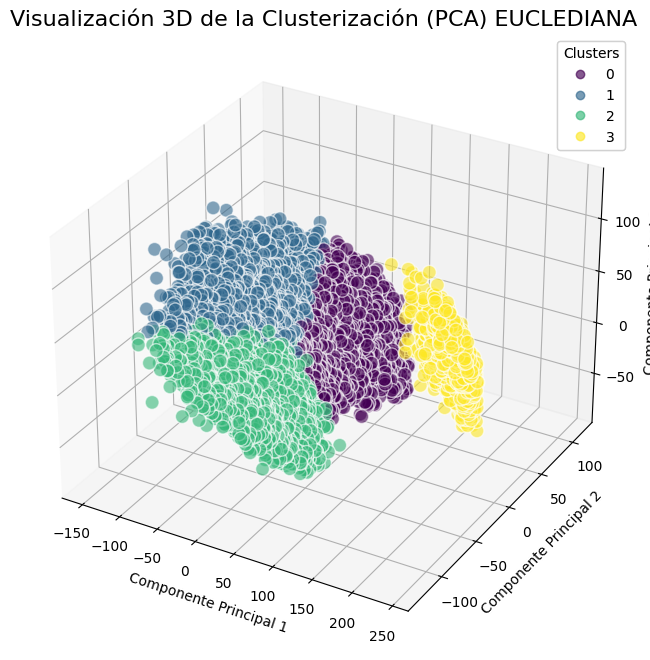

In [54]:
euclediana_3D = graficar_clusters_PCA3D(clusters_manuales, 'EUCLEDIANA', centrooids)

# DISTANCIA MAHALANOBIS


In [55]:
from scipy.spatial import distance
import random

cov = np.cov(X_.T)  # Matriz de covarianza
cov_inv = np.linalg.inv(cov)  # Inversa

#definimos distancia de mahalanobis
def distancia_mahalanobis(x, c):
    return distance.mahalanobis(x, c, cov_inv)

In [56]:
#Variables de inicialización
k = 4 # numero de clusters
dimension_mahalanobis = X_.shape[0] #numero de puntos
clusters_mahalanobis = np.zeros(dimension_mahalanobis) #vector
distancias_mahalanobis = np.zeros((dimension_mahalanobis, k)) #Vector nulo para almacenar etiquetas
centroids_mahalanobis = X_[random.sample(range(dimension_mahalanobis), k)] #centroides
tol = 1e-6
error = 100

In [57]:
def distancia_euclideana(x, c):
  return np.sqrt(np.sum((x - c) ** 2))
# Repetir hasta que los centroides dejen de moverse significativamente
while error > tol:
  #Asignación de puntos a los clusters más cercanos
  for i in range(dimension_mahalanobis): #Iterar sobre las filas. La i representa jugador
    for j in range(k): #Iterar sobre las columnas. La j representa centroide
      distancias_mahalanobis[i,j] = distancia_mahalanobis(X_[i], centroids_mahalanobis[j])
    clusters_mahalanobis[i] = np.argmin(distancias[i])

#Almacenar los centroides previos antes de actualizarlos
  centroids_prev_mahalanobis = np.copy(centroids_mahalanobis)

#Actualizar centroides
  for l in range(k):
    puntos_cluster = X_[clusters_mahalanobis == l]

    #Si el cluster no está vacío, recalcula el centroide
    if len(puntos_cluster) > 0:
        centroids_mahalanobis[l] = np.mean(puntos_cluster, axis=0)
    else:
         #Si el cluster está vacío, se puede dejar el centroide como estaba o reasignarloa un punto aleatorio
         print(f"Cluster {l} está vacío. Reasignando a un punto aleatorio.")
         centroids_mahalanobis[l] = X_[np.random.choice(dimension_mahalanobis)]

#Calcular el error como el cambio promedio en los centroides
  error = np.mean([distancia_euclideana(centroids_mahalanobis[l], centroids_prev_mahalanobis[l]) for l in range(k)])
  print(error)



102.68995525689704
0.0


In [62]:
centroids_mahalanobis = np.array(centroids_mahalanobis) ##45 dimensiones
centrooids_mahalabonis= pca.transform(centroids_mahalanobis) ##3 dimensiones

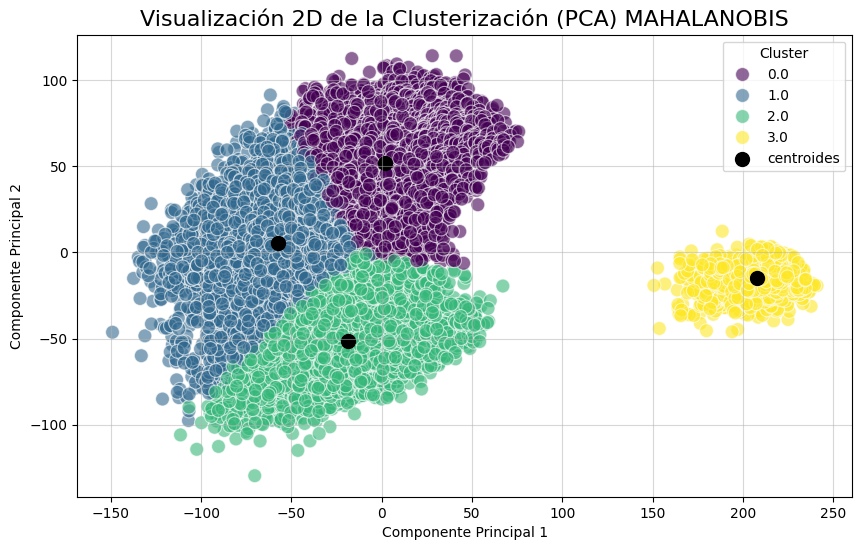

In [65]:
mahalanobis_2D = graficar_clusters_PCA2D(clusters_mahalanobis, 'MAHALANOBIS', centrooids_mahalabonis)
mahalanobis_2D

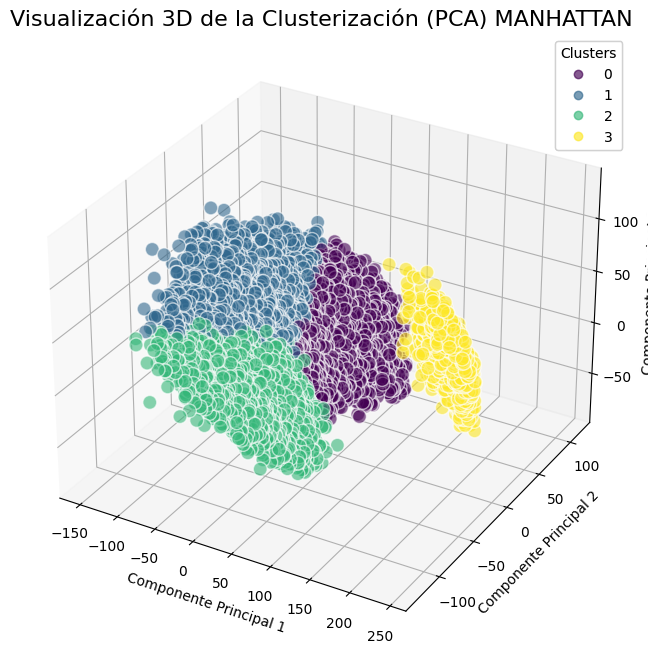

In [67]:
mahalanobis_3D = graficar_clusters_PCA3D(clusters_mahalanobis,'MANHATTAN',centrooids_mahalabonis)
mahalanobis_3D

# DISTANCIA MANHATTAN



In [ ]:
import random

In [68]:
##Definimos la distancia de Manhattan
def distancia_manhattan(x, c):
    return np.sum(np.abs(x - c)) #Suma de las diferencias absolutas

In [69]:
#Variables de inicializacióm
k = 4 #número de clusters
dimension_manhattan = X_.shape[0] #Numero de puntos
clusters_manhattan = np.zeros(dimension_manhattan) #vector
distancias_manhattan = np.zeros((dimension_manhattan, k))
centroids_manhattan = X_[random.sample(range(dimension_manhattan), k)] #centroides
tol = 1e-6
error = 100

In [70]:
def distancia_euclideana(x, c):
  return np.sqrt(np.sum((x - c) ** 2))

#Repetir hasta que los centroides dejen de moverse significativamente
while error > tol:
  #Asignación de puntos a los clusters más cercanos
  for i in range(dimension_manhattan): #Iterar sobre las filas. La i representa jugador
      for j in range(k): #Iterar sobre las columnas. La j representa centroide
        distancias_manhattan[i, j] = distancia_manhattan(X_[i], centroids_manhattan[j])
      clusters_manhattan[i] = np.argmin(distancias[i])

#Almacenar los centroides previos antes de actualizarlos
  centroids_prev_manhattan = np.copy(centroids_manhattan)

#Actualizar centroides
  for l in range(k):
    puntos_cluster = X_[clusters_manhattan == l]

    #Si el cluster no está vacío, recalcula el centroide
    if len(puntos_cluster) > 0:
        centroids_manhattan[l] = np.mean(puntos_cluster, axis=0)
    else:
      #Si el cluster está vacío, puedes dejar el centroide como estaba o reasignarlo a un punto aleatorio
      print(f"Cluster {l} está vacío. Reasignando a un punto aleatorio.")
      centroids_manhattan[l] = X_[np.random.choice(dimension_manhattan)]

    #Calcular el error como el cambio promedio en los centroides
    error = np.mean([distancia_euclideana(centroids_manhattan[l], centroids_prev_manhattan[l]) for l in range(k)])
    print(error)

25.590516913810763
47.65183873858658
75.40806050151943
134.50750483168258
0.0
0.0
0.0
0.0


In [71]:
centroids_manhattan = np.array(centroids_manhattan) ##45 dimensiones
centrooids_manhattan= pca.transform(centroids_manhattan) ##3 dimensiones

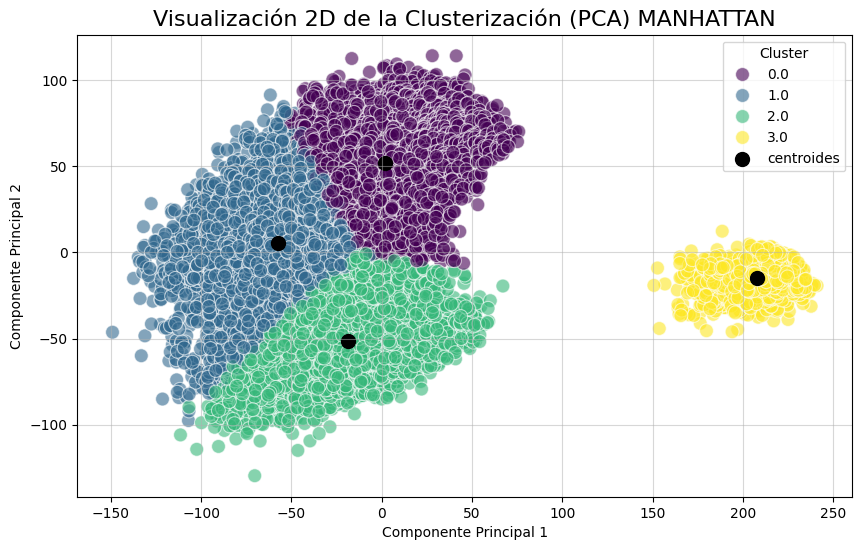

In [72]:
manhattan_2D = graficar_clusters_PCA2D(clusters_manhattan, 'MANHATTAN', centrooids_manhattan)
manhattan_2D

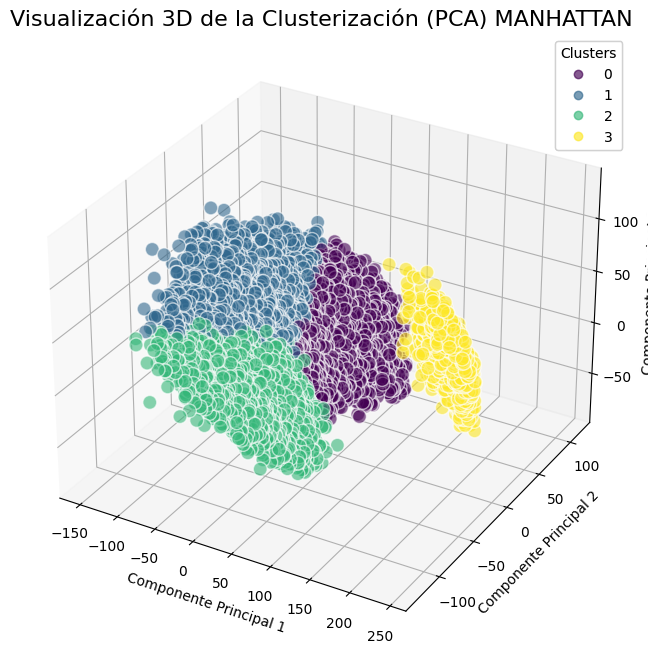

In [75]:
manhattan_3D = graficar_clusters_PCA3D(clusters_manhattan, 'MANHATTAN', centrooids_manhattan)
manhattan_3D